In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
!pip install tensorflow-gpu==2.1.0

     |████████████████████████████████| 421.8 MB 5.4 kB/s 
     |████████████████████████████████| 3.8 MB 32.4 MB/s 
     |████████████████████████████████| 448 kB 44.9 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=f2eeb236997bd477faadbc2e16470b59d3eade6a4135a2c4d529d66a9b0f9097
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succe

In [ ]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [ ]:
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.python.keras.utils.vis_utils import plot_model 
from tensorflow.keras.models import Model 
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
def format_output(data):
  y1 = data.pop("Y1")
  y1 = np.array(y1)
  y2 = data.pop("Y2")
  y2 = np.array(y2) 
  return y1,y2

In [ ]:
def norm(x):
  return (x - train_stats["mean"])/train_stats["std"]

In [ ]:
def plot_diff(y_true, y_pred, title=""):
  plt.scatter(y_true, y_pred)
  plt.title(title)
  plt.xlabel("True Values")
  plt.ylabel("Prediction")
  plt.axis("equal")
  plt.axis("square")
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  plt.plot([-100, 100], [-100, 100])
  plt.show()

In [50]:
def plot_matrics(metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0, ylim)
  plt.plot(history.history[metric_name], color="blue", label=metric_name)
  plt.plot(history.history["val_"+metric_name], color="green", label="val_"+metric_name)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.69,735.0,294.0,220.5,3.5,2,0.10,1,11.11,14.28
1,0.76,661.5,416.5,122.5,7.0,2,0.40,4,40.68,40.36
2,0.90,563.5,318.5,122.5,7.0,5,0.40,1,35.96,40.99
3,0.82,612.5,318.5,147.0,7.0,4,0.10,5,22.89,28.88
4,0.90,563.5,318.5,122.5,7.0,3,0.40,2,36.57,35.39
...,...,...,...,...,...,...,...,...,...,...
763,0.74,686.0,245.0,220.5,3.5,2,0.40,2,14.54,16.43
764,0.62,808.5,367.5,220.5,3.5,5,0.10,4,13.00,14.47
765,0.82,612.5,318.5,147.0,7.0,2,0.25,1,26.84,30.17
766,0.90,563.5,318.5,122.5,7.0,2,0.40,1,36.47,39.28


In [38]:
url = "/content/ENB2012_data (1).xlsx"

df = pd.read_excel(url)
df.sample(frac=1).reset_index(drop=True)
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()

train_Y = format_output(train) 
test_Y = format_output(test)

normal_train_x = norm(train)
normal_test_x = norm(test)

In [39]:
#models

input = Input(shape=len((train.columns),))

first_dense = Dense(128, activation="relu")(input)
second_dense = Dense(128, activation="relu")(first_dense)

y1_output = Dense(1, name="y1_output")(second_dense)
third_dense = Dense(64, activation="relu")(second_dense)


y2_output = Dense(1, name="y2_output")(third_dense)


model = Model(inputs = input, outputs = [y1_output, y2_output])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

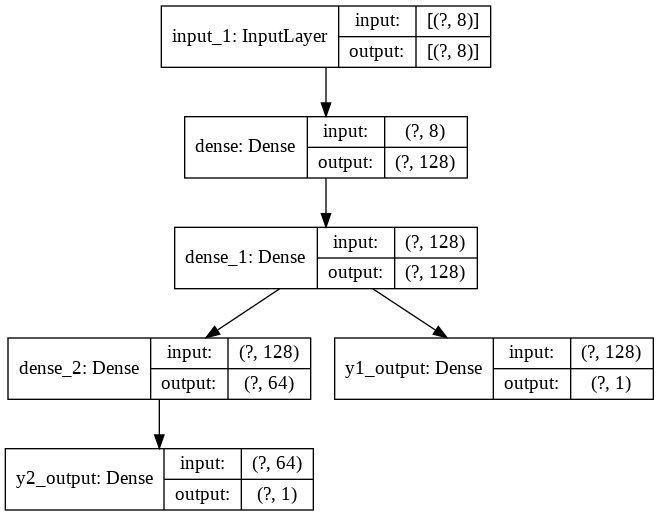

In [40]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file="model.png")

In [42]:

optimizer = tf.keras.optimizers.SGD(lr=0.001)

model.compile(
    optimizer = optimizer,
    loss = {"y1_output": "mse", "y2_output":"mse"},
    metrics={"y1_output": tf.keras.metrics.RootMeanSquaredError(),
             "y2_output": tf.keras.metrics.RootMeanSquaredError()}

)

In [ ]:
history = model.fit(normal_train_x, train_Y, epochs=500, batch_size=10, validation_data=(normal_test_x, test_Y))

In [45]:
loss, y1_output_loss, y2_output_loss, y1_output_rmse, y2_output_rmse=model.evaluate(x= normal_test_x, y=test_Y)

154/154 [==============================] - 0s 100us/sample - loss: 0.9367 - y1_output_loss: 0.2068 - y2_output_loss: 0.7392 - y1_output_root_mean_squared_error: 0.4562 - y2_output_root_mean_squared_error: 0.8536


In [46]:
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, y1_output_loss, y1_output_rmse, y2_output_loss, y2_output_rmse))

Loss = 0.9367107787689606, Y1_loss = 0.20675703883171082, Y1_mse = 0.45619794726371765, Y2_loss = 0.7392049431800842, Y2_mse = 0.8535773158073425


In [55]:
print(history.history["y1_output_root_mean_squared_error"])
print(history.history["val_y1_output_root_mean_squared_error"])

[10.716686, 3.3524888, 3.1991577, 3.0323145, 2.9720979, 2.9335382, 2.9265273, 2.8114643, 2.8305306, 2.8059738, 2.8273652, 2.6554642, 2.6448665, 2.595102, 2.53202, 2.4934578, 2.4137387, 2.5472891, 2.4162822, 2.319371, 2.3745368, 2.2192113, 2.2199717, 2.2804365, 2.0763903, 2.0712252, 2.0898438, 2.2191772, 2.0518754, 1.9958965, 1.9435003, 1.8655334, 2.1334949, 1.7046126, 1.7792134, 1.6826296, 2.2708082, 1.6928334, 1.6492397, 1.5889369, 1.6879728, 1.5475051, 1.5144823, 1.5202016, 1.5667876, 1.4419901, 1.5236034, 1.5978903, 1.6404611, 1.5854369, 1.5359863, 1.4596142, 1.4687662, 1.4474005, 1.4765799, 1.4028325, 1.3314778, 1.320113, 1.3078017, 1.3079058, 1.230312, 1.3087215, 1.2457042, 1.3185074, 1.193763, 1.1978825, 1.2090386, 1.2621337, 1.0374882, 1.2424461, 1.0443296, 1.1263579, 1.8295668, 0.9251209, 0.99741477, 0.9781564, 0.967316, 0.8644682, 0.8774273, 0.9028626, 0.9857811, 0.8773363, 0.9462824, 1.060449, 0.86730295, 0.8587538, 0.9152441, 0.9518618, 1.238067, 0.84689313, 0.84414274, 0.89

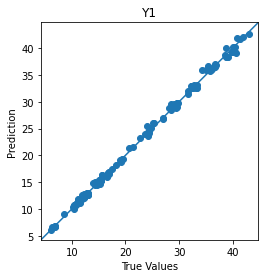

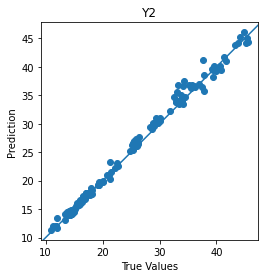

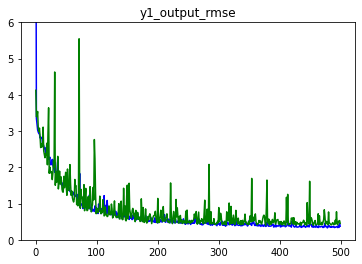

In [52]:
Y_pred = model.predict(normal_test_x)

plot_diff(test_Y[0], Y_pred[0], title="Y1") 
plot_diff(test_Y[1], Y_pred[1], title="Y2") 

plot_matrics("y1_output_root_mean_squared_error", title="y1_output_rmse", ylim=6)


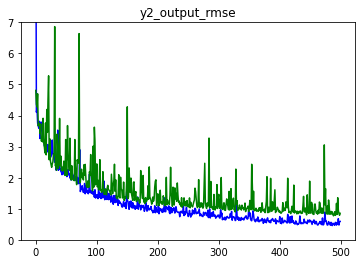

In [53]:
plot_matrics("y2_output_root_mean_squared_error", title="y2_output_rmse", ylim=7)